In [1]:
from math import log2, ceil

p=0.5 # 확률 50%
h=-log2(p) # 이벤트 정보 계산
print('확률 :',p)
print('정보량 :',h,ceil(h)) # 경우의 수 2개, 1bit로 표현 가능 (2^1=2)

확률 : 0.5
정보량 : 1.0 1


In [3]:
p=0.1 # 확률 10%
h=-log2(p)
print('확률 :',p)
print('정보량 :',h,ceil(h)) # 경우의 수 10개, 4bit 필요함 (2^3 ≤ 10 ≤ 2^4)

확률 : 0.1
정보량 : 3.321928094887362 4


In [4]:
p=1/6 # 확률 1/6
h=-log2(p)
print('확률 :',p)
print('정보량 :',h,ceil(h)) # 경우의 수 6개, 3bit 필요함 (2^2 ≤ 6 ≤ 2^3)

확률 : 0.16666666666666666
정보량 : 2.584962500721156 3


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'Information')

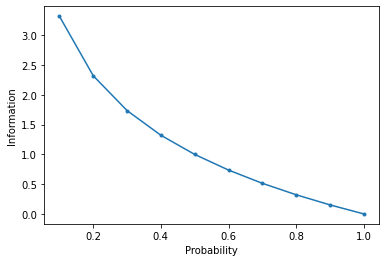

In [6]:
# 확률과 엔트로피
import numpy as np
from matplotlib import pyplot as plt
probs=np.arange(0.1, 1.1, 0.1) # 확률
print(probs)
info=[-log2(p) for p in probs] # 정보량 계산

plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')
# 확률이 높을수록 정보량은 감소하고 확률이 낮을수록 정보량은 증가한다

In [7]:
# 랜덤 변수에 대한 정보를 계산하는 것을 '(정보) 엔트로피'라고 함
# 각 사건의 확률에 대한 로그값에 각 사건의 확률을 곱한 값을 합계의 음수

# 주사위 던지기의 엔트로피 계산
from math import log2

n=6
p=1.0/n

entropy=-sum([p*log2(p) for _ in range(n)]) # 엔트로피 구하는 공식

print(entropy) # 비트

2.584962500721156


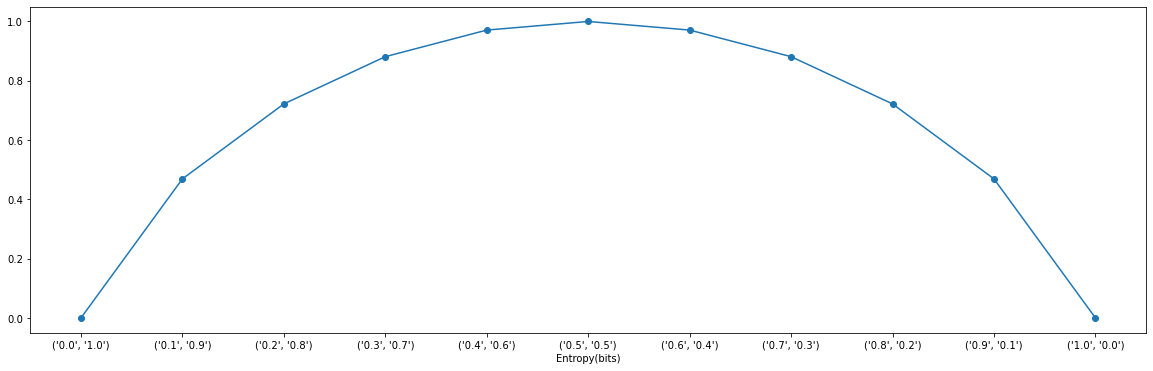

In [10]:
# 엔트로피는 0~1 사이의 값
# 1개 클래스만 구성되어 있으면 0(순도 100%), 2개 클래스가 같은 비율(50:50)로 섞여 있으면 1
def entropy(events):
    return -sum([p*log2(p+1e-15) for p in events]) # 1e-15 : p=0일 때를 대비해 임의로 더해주는 매우 작은 양수

probs=np.arange(0.0, 1.1, 0.1) # 확률
dists=[[p, 1-p] for p in probs] # 확률 분포
ents=[entropy(d) for d in dists] # 각 분포에 대한 엔트로피 계산 

# 확률 분포와 엔트로피 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd=(f'{d[0]:.1f}',f'{d[1]:.1f}')
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution')
plt.xlabel('Entropy(bits)')
plt.show()

In [12]:
# 지니 계수 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표 (0~0.5)
# 100% 순수한 노드로 구성되어 있으면 0, 클래스별로 균등하게 분포되어 있으면(50:50) 0.5
# 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 좀 더 우수함

a=np.array([1,3,6])
b=np.array([2,4,6])

diff=np.subtract.outer(a,b) # a의 각 원소에서 b의 각 원소를 뺀 행렬
print(diff)

[[-1 -3 -5]
 [ 1 -1 -3]
 [ 4  2  0]]


In [13]:
def gini(x):
    mad=np.abs(np.subtract.outer(x,x)).mean() # 평균 절대 오차
    rmad=mad/np.mean(x) # 평균 절대 오차를 평균으로 나누고
    g=0.5*rmad # 0.5를 곱하여 리턴
    return g

v=[0,1,0,1] # 2개 클래스가 균등하게 섞여 있음 : 지니 계수 0.5
print(gini(v))
v=[1,1,1,1] # 1개 클래스만으로 100% 구성 : 지니계수 0
print(gini(v))
v=[1,0,1,1]
print(gini(v))

0.5
0.0
0.25


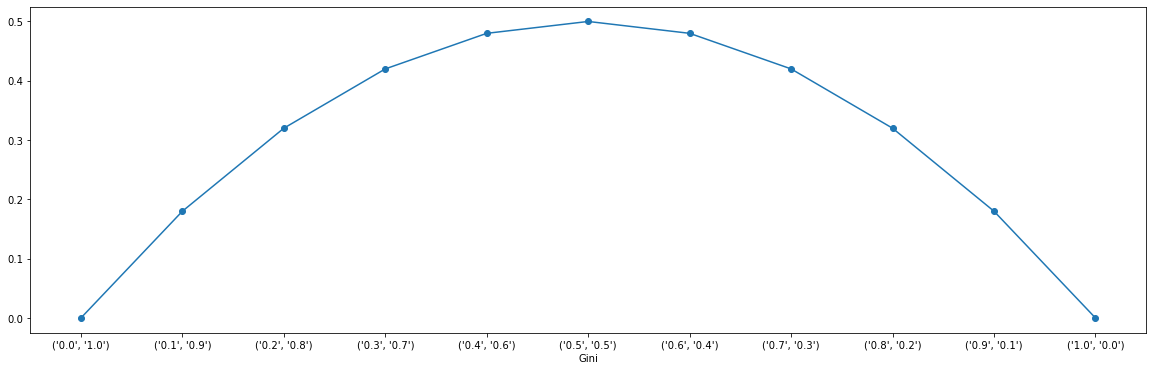

In [14]:
def gini2(events):
    return sum([p*(1-p) for p in events])

probs=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # 확률
dists=[[p,1-p] for p in probs] # 확률 분포
ents=[gini2(d) for d in dists] # 각 분포에 대한 지니 계수 계산

# 확률 분포와 지니 계수 그래프
plt.figure(figsize=(20,6))
plt.plot(probs,ents,marker='o')
xnum=[]
for d in dists:
    dd=(str(d[0]),f'{d[1]:.1f}')
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution')
plt.xlabel('Gini')
plt.show()